In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [4]:
# Preprocesamiento

df = pd.read_excel("datos_constructora.xlsx")

In [5]:
df.head()

,ID Proyecto,Nombre Proyecto,Fecha Inicio,Fecha Termino,Estado Proyecto,Item Costo,Categoria Gasto,Costo Presupuestado,Costo Real,Proveedor,...,Fecha Encuesta,Puntaje Satisfaccion,Comentarios Cliente,Problemas Reportados,Tipo Edificio,Consumo Energia (kWh),Tipo Energia,Impacto CO2 Estimado,Certificacion LEED,Puntaje Eficiencia Energetica
0,PJT-001,Proyecto Santa Rosa,2023-01-01,2024-01-01,En ejecucion,Aislacion,Mano de Obra,19981605,43028572,Servicios del Sur,...,2025-07-02,7,Postventa lenta,11,Local comercial,19929,Gas,16.39,No,2
1,PJT-002,Proyecto La Reina,2023-01-08,2024-01-10,Finalizado,Excavacion,Transporte,40919509,14361118,Constructora Los Andes,...,2025-07-03,1,Sin problemas,20,Oficina,3070,Gas,186.45,SI,24
2,PJT-003,Proyecto Independencia,2023-01-15,2024-01-19,Finalizado,Excavacion,Mano de Obra,8485017,56970569,Proyectos Austral,...,2025-07-04,9,Postventa lenta,3,Oficina,24906,Gas,160.16,SI,87
3,PJT-004,Proyecto Mapocho,2023-01-22,2024-01-28,En ejecucion,Pintura,Maquinaria,33322903,5823380,Constructora Maipo,...,2025-07-05,4,Demora,26,Local comercial,3850,Gas,149.38,SI,66
4,PJT-005,Proyecto Mapocho,2023-01-29,2024-02-06,Finalizado,Terminaciones,Materiales,791658296,205660460,Constructora Maipo,...,2025-07-06,3,Demora,1,Edificio,23437,Gas,188.00,No,38


In [6]:
df.columns

Index(['ID Proyecto', 'Nombre Proyecto', 'Fecha Inicio', 'Fecha Termino',
       'Estado Proyecto', 'Item Costo', 'Categoria Gasto',
       'Costo Presupuestado', 'Costo Real', 'Proveedor', 'ID Material',
       'Nombre Material', 'Cantidad Utilizada', 'Cantidad Comprada',
       'Fecha Uso Material', 'ID Trabajador', 'Nombre Trabajador', 'Rol',
       'Habilidades', 'Horas Trabajadas', 'ID Maquinaria', 'Uso Maquinaria',
       'Costo Operación', 'Fecha Incidente', 'Tipo Incidente', 'Gravedad',
       'Causa Incidente', 'Porcentaje Avance Esperado',
       'Porcentaje Avance Real', 'Fecha Estimacion Entrega',
       'Fecha Real Entrega', 'Lluvia (mm)', 'Temperatura (°C)',
       'Viento (km/h)', 'Fecha', 'Fase Obra', 'Rendimiento Equipo', 'Retrasos',
       'Motivo Retraso', 'Horas Laborales', 'Horas Perdidas',
       'ID Cuello Botella', 'Descripcion Problema', 'Fecha Accidente',
       'Parte Afectada', 'Dias Incapacidad', 'Hospitalizacion', 'Uso EPP',
       'Capacitaciones Realizad

In [7]:
# Preparar datos
df_fechas = df.copy()
df_fechas = df_fechas.dropna(subset=["Fecha Inicio", "Costo Real"])
df_fechas["Fecha Ord"] = df_fechas["Fecha Inicio"].map(pd.Timestamp.toordinal)

# Entrenar modelo
X = df_fechas[["Fecha Ord"]]
y = df_fechas["Costo Real"]
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir costos para los próximos 6 meses
import datetime
fechas_futuras = [datetime.date.today() + datetime.timedelta(days=30*i) for i in range(1, 7)]
fechas_ord = np.array([f.toordinal() for f in fechas_futuras]).reshape(-1, 1)
costos_predichos = modelo.predict(fechas_ord)

# Mostrar predicciones
for fecha, pred in zip(fechas_futuras, costos_predichos):
    print(f"{fecha}: ${pred:,.0f}")

2025-10-16: $176,163,951
2025-11-15: $176,693,847
2025-12-15: $177,223,742
2026-01-14: $177,753,638
2026-02-13: $178,283,534
2026-03-15: $178,813,430


c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



                      Costo Presupuestado  Costo Real  Desviación Absoluta  \
Nombre Proyecto                                                              
Proyecto Santa Rosa            1693055333  3389636859           1696581526   
Proyecto Vitacura              1326254041  2194724350            868470309   
Proyecto Aurora                2780556564  4189838682           1409282118   
Proyecto Puente Alto           2327529361  3450841963           1123312602   
Proyecto Providencia           4574022921  5085425301            511402380   

                      Desviación %  
Nombre Proyecto                     
Proyecto Santa Rosa     100.208274  
Proyecto Vitacura        65.482953  
Proyecto Aurora          50.683454  
Proyecto Puente Alto     48.262016  
Proyecto Providencia     11.180582  


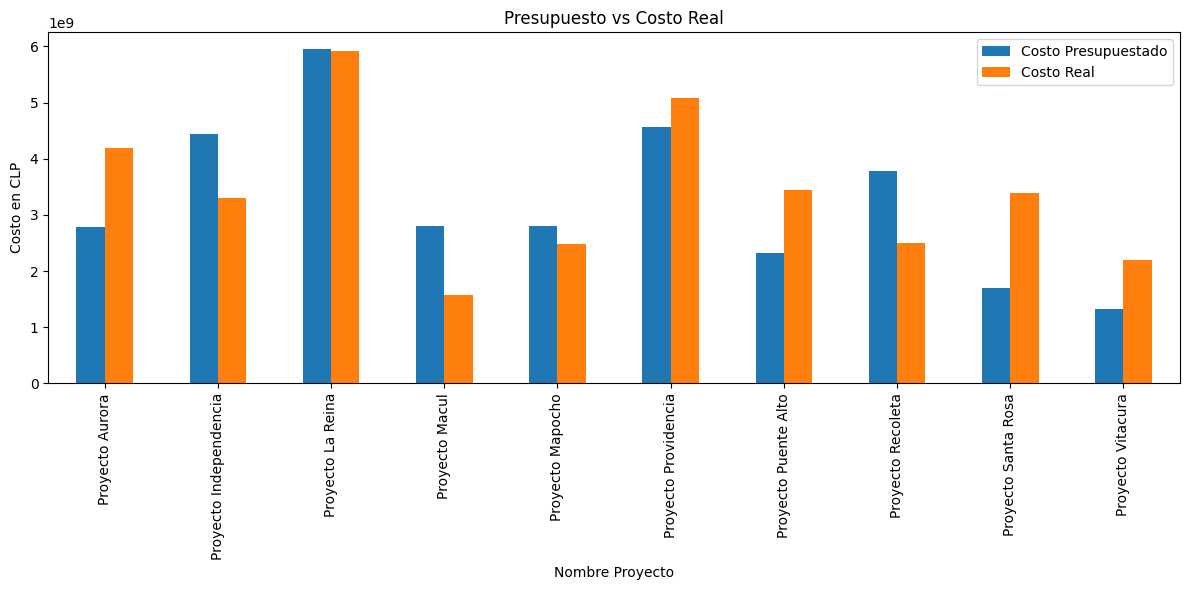

In [8]:
import matplotlib.pyplot as plt

# Agrupación por proyecto
df_costos = df.groupby("Nombre Proyecto")[["Costo Presupuestado", "Costo Real"]].sum()
df_costos["Desviación Absoluta"] = df_costos["Costo Real"] - df_costos["Costo Presupuestado"]
df_costos["Desviación %"] = (df_costos["Desviación Absoluta"] / df_costos["Costo Presupuestado"]) * 100

# Mostrar principales desviaciones
print(df_costos.sort_values(by="Desviación %", ascending=False).head())

# Visualización
df_costos[["Costo Presupuestado", "Costo Real"]].plot(kind="bar", figsize=(12,6), title="Presupuesto vs Costo Real")
plt.ylabel("Costo en CLP")
plt.tight_layout()
plt.show()

C:\Users\Axel\AppData\Local\Temp\ipykernel_23124\1145425175.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Axel\AppData\Local\Temp\ipykernel_23124\1145425175.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



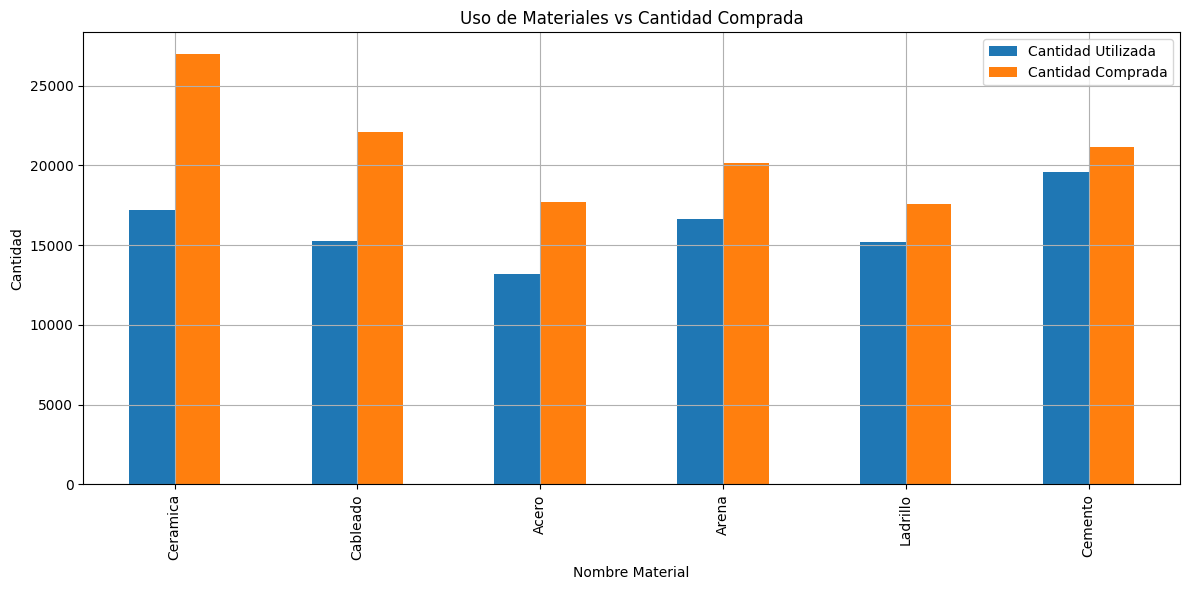

In [9]:
# Filtrar columnas necesarias
materiales_df = df[["Nombre Material", "Cantidad Utilizada", "Cantidad Comprada"]]
# Convertir a tipo numérico
materiales_df["Cantidad Utilizada"] = pd.to_numeric(materiales_df["Cantidad Utilizada"], errors='coerce')
materiales_df["Cantidad Comprada"] = pd.to_numeric(materiales_df["Cantidad Comprada"], errors='coerce')
# Eliminar filas con valores NaN
materiales_df = materiales_df.dropna()
# Calcular desperdicio
materiales_df["Desperdicio"] = materiales_df["Cantidad Comprada"] - materiales_df["Cantidad Utilizada"]
# Agrupar por tipo de material
materiales_agrupados = materiales_df.groupby("Nombre Material").sum().sort_values("Desperdicio", ascending=False)
# Visualizar uso vs comprado
materiales_agrupados[["Cantidad Utilizada", "Cantidad Comprada"]].plot(
    kind="bar", figsize=(12,6), title="Uso de Materiales vs Cantidad Comprada")
plt.ylabel("Cantidad")
plt.grid(True)
plt.tight_layout()
plt.show()

🔎 Top 10 materiales más desperdiciados por proyecto:
           Nombre Proyecto Nombre Material  Desperdicio Material
33    Proyecto Providencia        Ceramica                  2708
7   Proyecto Independencia           Arena                  2652
28        Proyecto Mapocho        Ceramica                  2140
20          Proyecto Macul        Cableado                  2008
10  Proyecto Independencia        Ceramica                  1965
24        Proyecto Mapocho           Acero                  1760
8   Proyecto Independencia        Cableado                  1677
43       Proyecto Recoleta         Cemento                  1450
54       Proyecto Vitacura        Cableado                  1434
40       Proyecto Recoleta           Acero                  1378


C:\Users\Axel\AppData\Local\Temp\ipykernel_23124\400909183.py:19: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.

C:\Users\Axel\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.



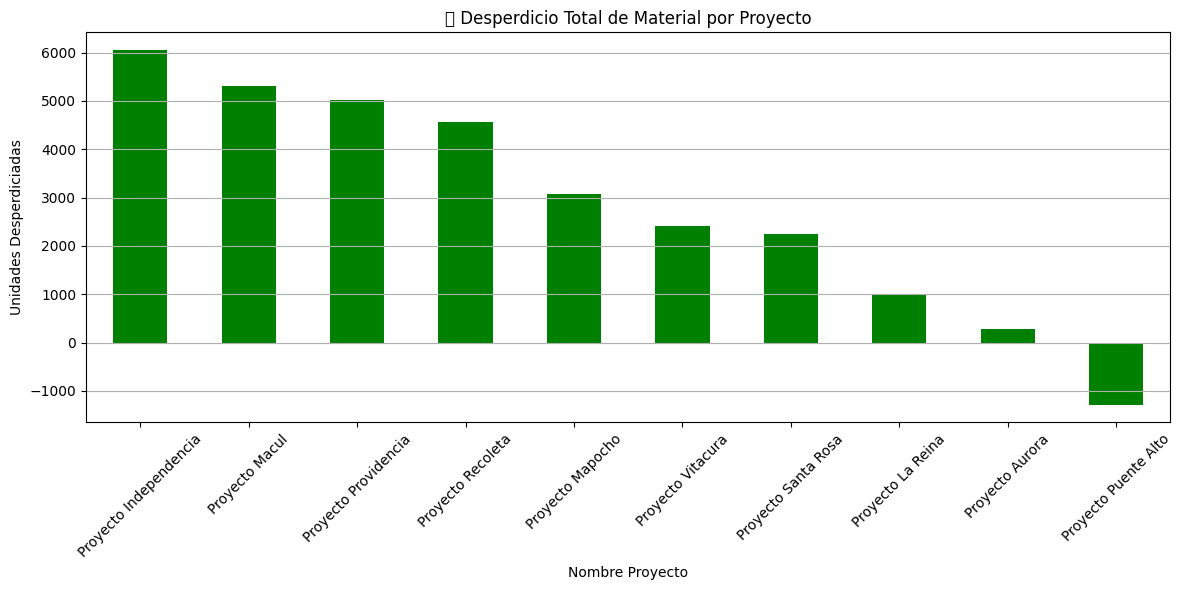

In [10]:
# Calcular desperdicio de materiales
df['Desperdicio Material'] = df['Cantidad Comprada'] - df['Cantidad Utilizada']
# Agrupar por nombre de proyecto y nombre de material
desperdicio_por_proyecto = df.groupby(['Nombre Proyecto', 'Nombre Material'])['Desperdicio Material'].sum().reset_index()
# Ordenar por mayor desperdicio
desperdicio_ordenado = desperdicio_por_proyecto.sort_values(by='Desperdicio Material', ascending=False)
# Mostrar los 10 materiales con mayor desperdicio por proyecto
print("🔎 Top 10 materiales más desperdiciados por proyecto:")
print(desperdicio_ordenado.head(10))
# Visualización: desperdicio total por nombre de proyecto
total_desp_por_proyecto = desperdicio_por_proyecto.groupby('Nombre Proyecto')['Desperdicio Material'].sum().sort_values(ascending=False)
# Plot
plt.figure(figsize=(12, 6))
total_desp_por_proyecto.plot(kind='bar', color='green')
plt.title("📦 Desperdicio Total de Material por Proyecto")
plt.ylabel("Unidades Desperdiciadas")
plt.xlabel("Nombre Proyecto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


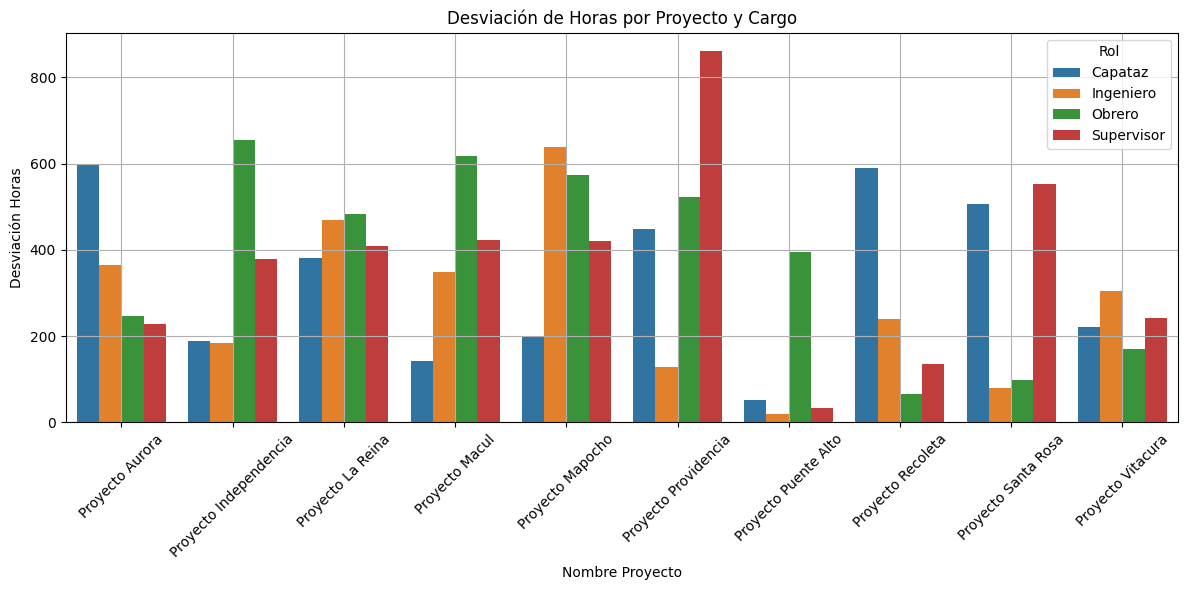

In [11]:
import seaborn as sns

# Asegurarse que estén estas columnas en el archivo
personal_df = df[["Nombre Proyecto", "Nombre Trabajador", "Rol", "Horas Laborales", "Horas Trabajadas"]].dropna()

# Calcular desviación de horas
personal_df["Desviación Horas"] = personal_df["Horas Laborales"] - personal_df["Horas Trabajadas"]

# Agrupar por proyecto y cargo
asignacion = personal_df.groupby(["Nombre Proyecto", "Rol"]).agg({
    "Nombre Trabajador": "count",
    "Horas Laborales": "sum",
    "Horas Trabajadas": "sum",
    "Desviación Horas": "sum"
}).rename(columns={"Nombre Trabajador": "Cantidad Trabajadores"}).reset_index()

# Visualizar desviación por proyecto
plt.figure(figsize=(12,6))
sns.barplot(data=asignacion, x="Nombre Proyecto", y="Desviación Horas", hue="Rol")
plt.title("Desviación de Horas por Proyecto y Cargo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\Axel\AppData\Local\Temp\ipykernel_23124\948016454.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




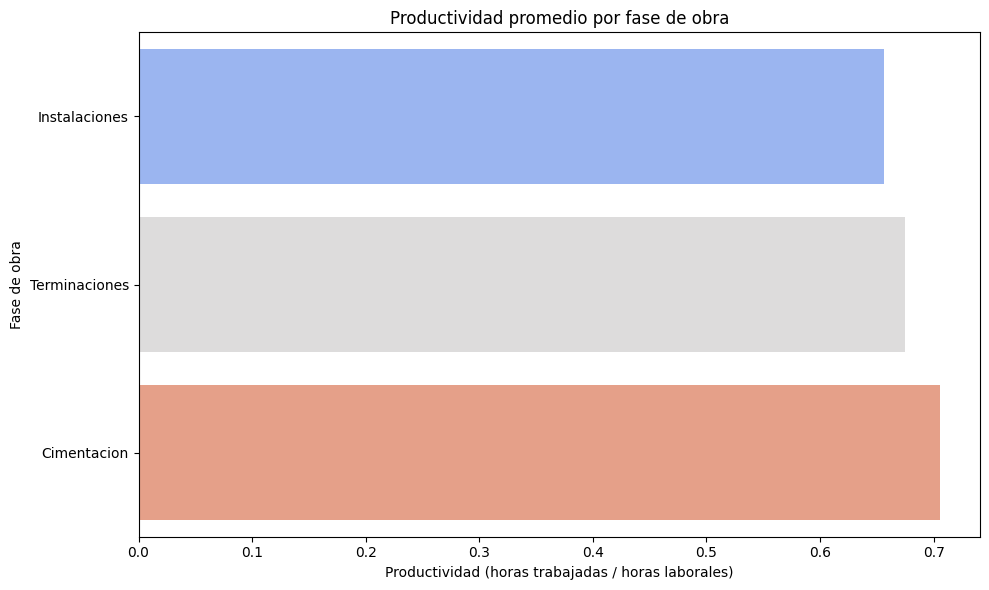

C:\Users\Axel\AppData\Local\Temp\ipykernel_23124\948016454.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.





📌 Fases con menor productividad (cuellos de botella):
fase obra
Instalaciones    0.656454
Terminaciones    0.675077
Cimentacion      0.705526
Name: productividad, dtype: float64

🔍 Se identificaron 200 cuellos de botella registrados:
       fase obra id cuello botella descripcion problema
0    Cimentacion           CBT-001   Problema logistica
1    Cimentacion           CBT-002         Sin problema
2  Terminaciones           CBT-003       Demora externa
3    Cimentacion           CBT-004       Demora externa
4  Instalaciones           CBT-005       Demora externa


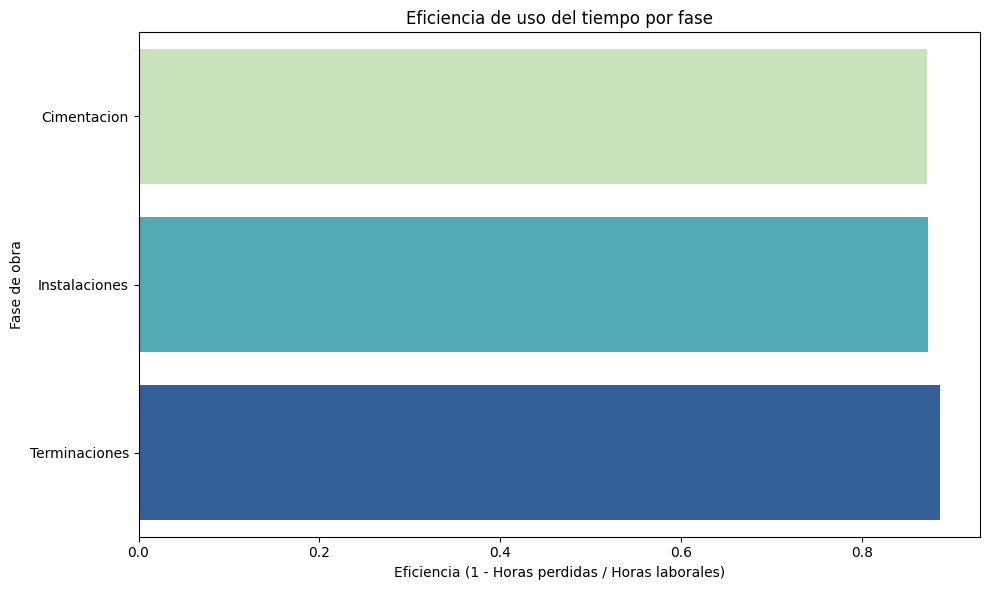


⚠️ Fases con mayor pérdida de tiempo:
fase obra
Cimentacion      0.872356
Instalaciones    0.872588
Terminaciones    0.886220
Name: eficiencia_tiempo, dtype: float64


In [12]:
# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower()

# --- 1. Seguimiento de la productividad por fase de obra ---

# Verificamos las columnas necesarias
if {'fase obra', 'horas trabajadas', 'horas laborales', 'rendimiento equipo'}.issubset(df.columns):

    # Productividad por fase: (horas trabajadas / horas laborales)
    df['productividad'] = df['horas trabajadas'] / df['horas laborales']
    
    productividad_fase = df.groupby('fase obra')['productividad'].mean().sort_values()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=productividad_fase.values, y=productividad_fase.index, palette='coolwarm')
    plt.title("Productividad promedio por fase de obra")
    plt.xlabel("Productividad (horas trabajadas / horas laborales)")
    plt.ylabel("Fase de obra")
    plt.tight_layout()
    plt.show()

    print("\n📌 Fases con menor productividad (cuellos de botella):")
    print(productividad_fase.head(3))
else:
    print("Faltan columnas necesarias para calcular productividad por fase.")

# --- 2. Identificación de cuellos de botella según registros específicos ---

if 'id cuello botella' in df.columns and 'descripcion problema' in df.columns:
    cuellos = df[['fase obra', 'id cuello botella', 'descripcion problema']].dropna().drop_duplicates()

    print(f"\n🔍 Se identificaron {cuellos.shape[0]} cuellos de botella registrados:")
    print(cuellos.head(5))
else:
    print("No se encontraron columnas de cuellos de botella para análisis específico.")

# --- 3. Eficiencia y pérdidas de tiempo ---

if 'horas laborales' in df.columns and 'horas perdidas' in df.columns:
    df['eficiencia_tiempo'] = 1 - (df['horas perdidas'] / df['horas laborales'])

    eficiencia_por_fase = df.groupby('fase obra')['eficiencia_tiempo'].mean().sort_values()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=eficiencia_por_fase.values, y=eficiencia_por_fase.index, palette='YlGnBu')
    plt.title("Eficiencia de uso del tiempo por fase")
    plt.xlabel("Eficiencia (1 - Horas perdidas / Horas laborales)")
    plt.ylabel("Fase de obra")
    plt.tight_layout()
    plt.show()

    print("\n⚠️ Fases con mayor pérdida de tiempo:")
    print(eficiencia_por_fase.head(3))
else:
    print("No se puede calcular eficiencia de tiempo. Columnas 'horas laborales' o 'horas perdidas' no existen.")


Interpretación:

¿Qué mide la eficiencia del tiempo?

La métrica eficiencia_tiempo = 1 - (horas perdidas / horas laborales) representa la proporción del tiempo laboral que fue efectivamente utilizado.

Por ejemplo, un valor de 0.87 significa que el 87% del tiempo fue útil, y el 13% se perdió por diversos motivos (esperas, mal uso de recursos, problemas logísticos, etc.).

📌 Análisis por fase:
Fase de Obra	Eficiencia (%)	Tiempo Perdido (%)	Interpretación
Cimentación	87.24%	12.76%	Alta pérdida de tiempo para una fase crítica inicial. Puede deberse a atrasos logísticos, mal clima, fallos de planificación o disponibilidad de materiales.
Instalaciones	87.26%	12.74%	Similar a cimentación, esta etapa intermedia está perdiendo más de 12% del tiempo. Puede deberse a errores de coordinación entre equipos (electricidad, sanitarios, etc.).
Terminaciones	88.62%	11.38%	Aunque algo mejor que las anteriores, sigue teniendo una pérdida relevante. A menudo las terminaciones se atrasan por dependencia de tareas anteriores no completadas o falta de insumos específicos.
🛠️ Recomendaciones:

Cimentación:

Revisar logística de entrega de materiales pesados.

Analizar interferencias por clima o problemas en la excavación.

Evaluar si la maquinaria o el personal estaba disponible en los tiempos requeridos.

Instalaciones:

Mejorar la coordinación entre disciplinas (gas, electricidad, sanitario).

Verificar si existen conflictos en planos o rediseños constantes.

Implementar mayor supervisión y control de tiempos.

Terminaciones:

Revisar cuellos de botella de materiales de terminación (acabados, pinturas, etc.).

Analizar si se están haciendo reprocesos por errores en fases anteriores.

✅ Conclusión:

Las tres fases con mayor pérdida de tiempo concentran entre un 11% y 13% de ineficiencia, lo cual puede significar semanas de retraso acumulado en un proyecto completo si no se toman acciones correctivas.

Frecuencia de accidentes:
Accidente
1    200
Name: count, dtype: int64

Partes del cuerpo más afectadas:
Parte Afectada
Ninguna    62
Brazo      54
Pierna     44
Cabeza     40
Name: count, dtype: int64

Promedio de días de incapacidad en accidentes:
14.78


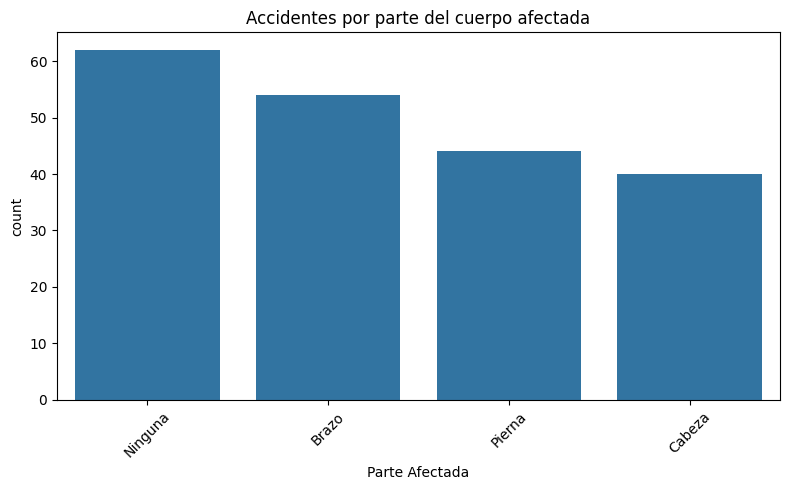


Reporte de clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Matriz de confusión:
[[40]]

Importancia de variables en la predicción de accidentes:
Parte Afectada      0.0
Dias Incapacidad    0.0
Hospitalizacion     0.0
dtype: float64


c:\Users\Axel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Cargar datos
df = pd.read_excel("datos_constructora.xlsx")

# 2. Crear variable binaria 'Accidente'
df['Accidente'] = df['Fecha Accidente'].notna().astype(int)

# 3. Limpiar datos
# Convertir días de incapacidad a numérico
df['Dias Incapacidad'] = pd.to_numeric(df['Dias Incapacidad'], errors='coerce').fillna(0)

# Rellenar valores nulos en columnas categóricas
cat_cols = ['Parte Afectada', 'Hospitalizacion']
for col in cat_cols:
    df[col] = df[col].fillna("No Especificado")

# 4. Análisis descriptivo
print("Frecuencia de accidentes:")
print(df['Accidente'].value_counts())

print("\nPartes del cuerpo más afectadas:")
print(df['Parte Afectada'].value_counts())

print("\nPromedio de días de incapacidad en accidentes:")
print(df.loc[df['Accidente'] == 1, 'Dias Incapacidad'].mean())

# Visualización: Accidentes por parte afectada
plt.figure(figsize=(8,5))
sns.countplot(data=df[df['Accidente']==1], x='Parte Afectada', order=df['Parte Afectada'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Accidentes por parte del cuerpo afectada")
plt.tight_layout()
plt.show()

# 5. Preparar datos para modelo predictivo
features = ['Parte Afectada', 'Dias Incapacidad', 'Hospitalizacion']
df_model = df[features + ['Accidente']].copy()

# Codificar variables categóricas
le = LabelEncoder()
for col in ['Parte Afectada', 'Hospitalizacion']:
    df_model[col] = le.fit_transform(df_model[col])

# Variables X e y
X = df_model[features]
y = df_model['Accidente']

# Entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Importancia de variables
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("\nImportancia de variables en la predicción de accidentes:")
print(importances)



===== MONITOREO DE SEGURIDAD =====
Accidente
1    100.0
Name: proportion, dtype: float64


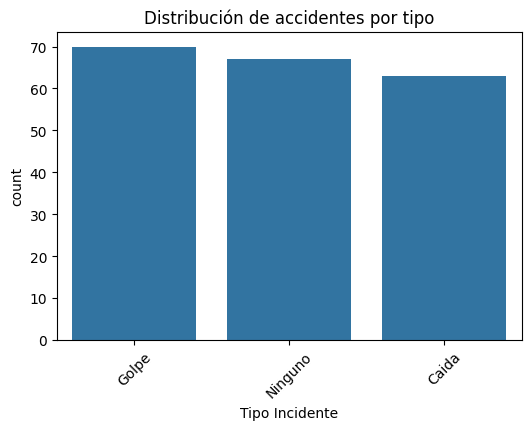

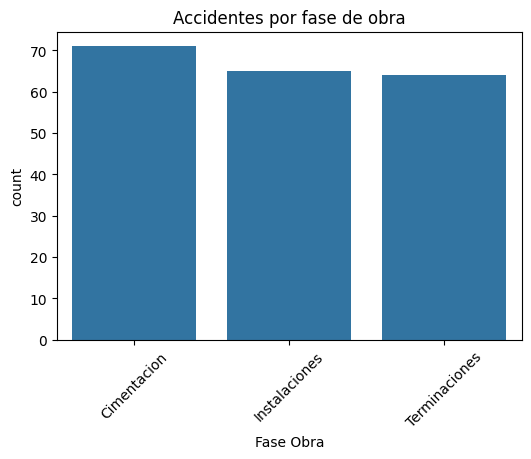


⚠ No hay suficientes clases para entrenar un modelo.


In [14]:
# ================================================
# ANÁLISIS DE SEGURIDAD Y PREDICCIÓN DE ACCIDENTES
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# --- 1. Cargar datos ---
df = pd.read_excel("datos_constructora.xlsx")

# --- 2. Crear variable objetivo ---
df['Accidente'] = np.where(df['Fecha Accidente'].notna(), 1, 0)

# --- 3. Monitoreo de seguridad ---
print("\n===== MONITOREO DE SEGURIDAD =====")
print(df['Accidente'].value_counts(normalize=True) * 100)

# Accidentes por tipo
if 'Tipo Incidente' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df[df['Accidente']==1], x='Tipo Incidente', order=df['Tipo Incidente'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Distribución de accidentes por tipo")
    plt.show()

# Accidentes por fase
if 'Fase Obra' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df[df['Accidente']==1], x='Fase Obra', order=df['Fase Obra'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Accidentes por fase de obra")
    plt.show()

# --- 4. Preparar datos para predicción ---
features = [
    'Fase Obra', 'Estado Proyecto', 'Rendimiento Equipo', 'Retrasos',
    'Horas Laborales', 'Horas Perdidas',
    'Lluvia (mm)', 'Temperatura (°C)', 'Viento (km/h)',
    'Uso EPP', 'Capacitaciones Realizadas', 'Resultado Inspeccion'
]

df_modelo = df[features + ['Accidente']].dropna()

X = df_modelo[features]
y = df_modelo['Accidente']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocesador = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ('num', 'passthrough', num_cols)
])

modelo_seguridad = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('clasificador', RandomForestClassifier(n_estimators=200, random_state=42))
])

# --- 5. Entrenar y evaluar ---
if y.nunique() > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    modelo_seguridad.fit(X_train, y_train)
    
    y_pred = modelo_seguridad.predict(X_test)
    print("\n===== EVALUACIÓN DEL MODELO =====")
    print(classification_report(y_test, y_pred))
    
    # Importancia de variables
    importancias = modelo_seguridad.named_steps['clasificador'].feature_importances_
    columnas_codificadas = modelo_seguridad.named_steps['preprocesamiento'].get_feature_names_out()
    importancia_df = pd.DataFrame({'Variable': columnas_codificadas, 'Importancia': importancias})
    importancia_df = importancia_df.sort_values(by='Importancia', ascending=False).head(10)
    
    plt.figure(figsize=(8,5))
    sns.barplot(data=importancia_df, x='Importancia', y='Variable')
    plt.title("Variables más influyentes en accidentes")
    plt.show()
    
    # Ranking de riesgo por proyecto
    df['Riesgo_Predicho'] = modelo_seguridad.predict_proba(df[features].dropna())[:,1]
    ranking = df.groupby(['ID Proyecto', 'Nombre Proyecto'])['Riesgo_Predicho'].mean().sort_values(ascending=False).head(5)
    print("\n===== TOP 5 PROYECTOS CON MAYOR RIESGO =====")
    print(ranking)

else:
    print("\n⚠ No hay suficientes clases para entrenar un modelo.")


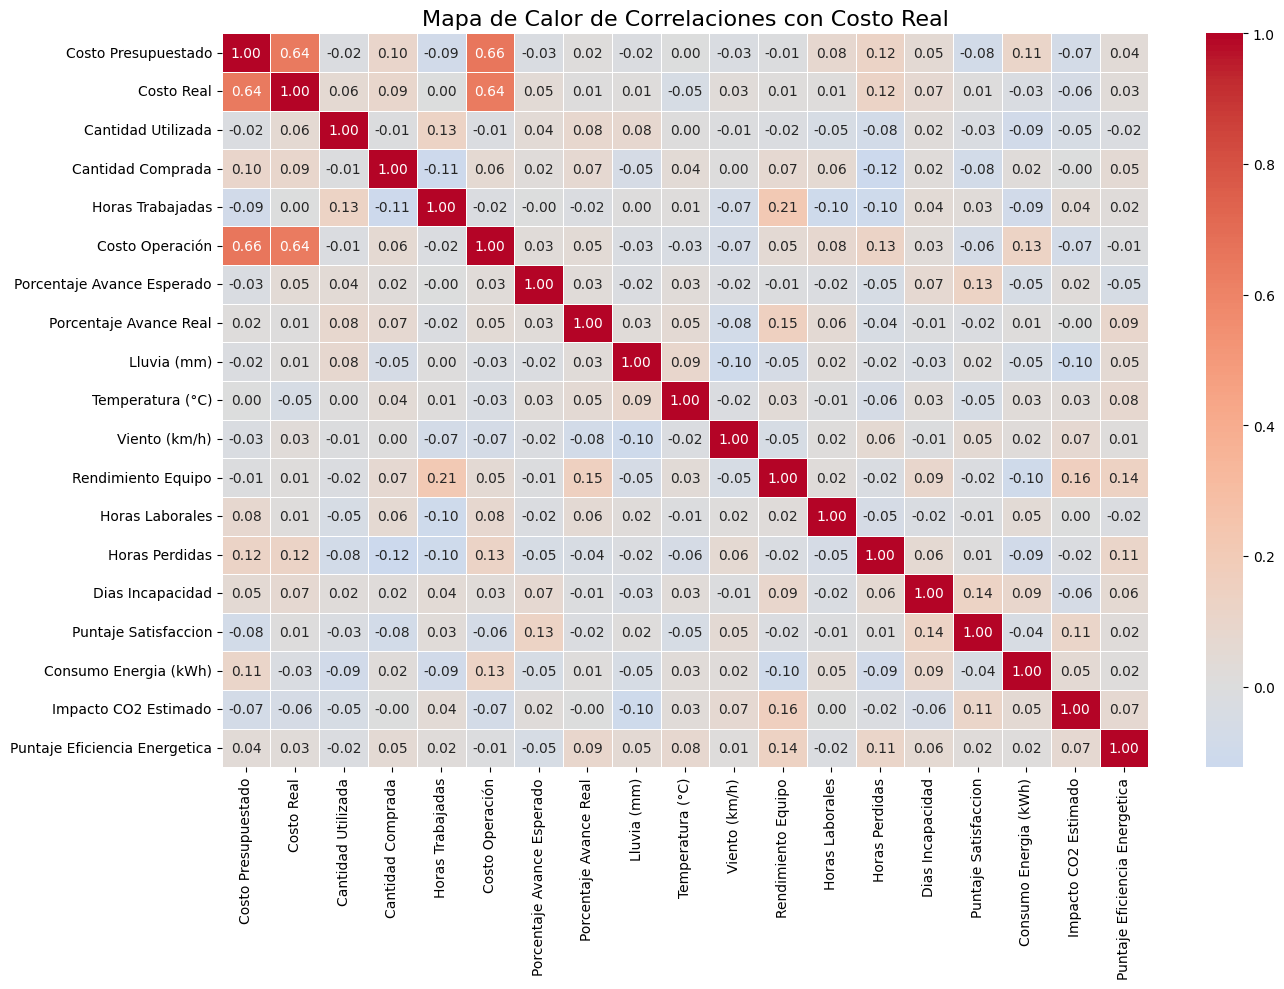

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================
# 1. Cargar datos
# ==============================
# Cambia la ruta del archivo si es necesario
df = pd.read_excel("datos_constructora.xlsx")

# ==============================
# 2. Seleccionar columnas numéricas de interés
# ==============================
columnas_interes = [
    "Costo Presupuestado", "Costo Real", "Cantidad Utilizada", "Cantidad Comprada",
    "Horas Trabajadas", "Costo Operación", "Porcentaje Avance Esperado",
    "Porcentaje Avance Real", "Lluvia (mm)", "Temperatura (°C)", "Viento (km/h)",
    "Rendimiento Equipo", "Horas Laborales", "Horas Perdidas", "Dias Incapacidad",
    "Puntaje Satisfaccion", "Consumo Energia (kWh)", "Impacto CO2 Estimado",
    "Puntaje Eficiencia Energetica"
]

# Filtrar solo columnas numéricas que existan en el dataset
columnas_numericas = [col for col in columnas_interes if col in df.columns]

# Convertir a numérico por si hay datos no numéricos
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors="coerce")

# ==============================
# 3. Calcular la matriz de correlaciones
# ==============================
corr_matrix = df[columnas_numericas].corr()

# ==============================
# 4. Crear el mapa de calor
# ==============================
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,      # Muestra valores numéricos
    fmt=".2f",       # Formato de los números
    cmap="coolwarm", # Colores del mapa
    center=0,        # Centrar en 0
    linewidths=0.5   # Líneas entre celdas
)
plt.title("Mapa de Calor de Correlaciones con Costo Real", fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import plotly.express as px

# Cargar datos
df = pd.read_excel("datos_constructora.xlsx")

# Convertir 'Fecha Inicio' y 'Fecha Incidente' a datetime
df['Fecha Inicio'] = pd.to_datetime(df['Fecha Inicio'], errors='coerce')
df['Fecha Incidente'] = pd.to_datetime(df['Fecha Incidente'], errors='coerce')

# ==== Agrupación de Costos Reales ====
df_costos = df.groupby([
    'Nombre Proyecto',
    pd.Grouper(key='Fecha Inicio', freq='M')
])['Costo Real'].sum().reset_index()

# ==== Agrupación de Incidentes ====
df_incidentes = df.groupby([
    'Nombre Proyecto',
    pd.Grouper(key='Fecha Incidente', freq='M')
])['Tipo Incidente'].count().reset_index().rename(columns={'Tipo Incidente': 'Cantidad Incidentes'})

# ==== Unir ambos datasets (por Proyecto + Mes) ====
df_costos['Mes'] = df_costos['Fecha Inicio'].dt.strftime('%Y-%m')
df_incidentes['Mes'] = df_incidentes['Fecha Incidente'].dt.strftime('%Y-%m')

# Hacer merge
df_final = pd.merge(
    df_costos[['Nombre Proyecto', 'Mes', 'Costo Real']],
    df_incidentes[['Nombre Proyecto', 'Mes', 'Cantidad Incidentes']],
    on=['Nombre Proyecto', 'Mes'],
    how='outer'
).fillna(0)

# ==== Heatmap de Costos Reales ====
fig1 = px.density_heatmap(
    df_final,
    x='Mes',
    y='Nombre Proyecto',
    z='Costo Real',
    color_continuous_scale='Reds',
    title='Mapa de Calor - Costos Reales por Proyecto y Mes'
)
fig1.update_layout(
    xaxis_title="Mes",
    yaxis_title="Proyecto",
    coloraxis_colorbar=dict(title="Costo Real ($)")
)
fig1.show()

# ==== Heatmap de Incidentes ====
fig2 = px.density_heatmap(
    df_final,
    x='Mes',
    y='Nombre Proyecto',
    z='Cantidad Incidentes',
    color_continuous_scale='Blues',
    title='Mapa de Calor - Incidentes por Proyecto y Mes'
)
fig2.update_layout(
    xaxis_title="Mes",
    yaxis_title="Proyecto",
    coloraxis_colorbar=dict(title="Cantidad de Incidentes")
)
fig2.show()


C:\Users\Axel\AppData\Local\Temp\ipykernel_23124\474358473.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Axel\AppData\Local\Temp\ipykernel_23124\474358473.py:20: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [19]:
import pandas as pd
import plotly.express as px

# Cargar datos
df = pd.read_excel("datos_constructora.xlsx")

# --- Análisis de satisfacción post-venta ---
# Promedio de puntaje por proyecto
satisfaccion_proyecto = df.groupby("Nombre Proyecto")["Puntaje Satisfaccion"].mean().reset_index()

fig1 = px.bar(
    satisfaccion_proyecto,
    x="Nombre Proyecto",
    y="Puntaje Satisfaccion",
    title="Promedio de Satisfacción por Proyecto",
    labels={"Puntaje Satisfaccion": "Puntaje Promedio"}
)
fig1.show()

# --- Segmentación de clientes ---
# Promedio de satisfacción por segmento
satisfaccion_segmento = df.groupby("Segmento Cliente")["Puntaje Satisfaccion"].mean().reset_index()

fig2 = px.bar(
    satisfaccion_segmento,
    x="Segmento Cliente",
    y="Puntaje Satisfaccion",
    title="Satisfacción Promedio por Segmento de Cliente",
    labels={"Puntaje Satisfaccion": "Puntaje Promedio"}
)
fig2.show()

# Opcional: nube de palabras de comentarios
from wordcloud import wordcloud
import matplotlib.pyplot as plt

texto_comentarios = " ".join(str(c) for c in df["Comentarios Cliente"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_comentarios)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Comentarios de Clientes")
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [20]:
# --- Modelado de consumo energético ---
consumo_proyecto = df.groupby("Nombre Proyecto")["Consumo Energia (kWh)"].sum().reset_index()

fig3 = px.bar(
    consumo_proyecto,
    x="Nombre Proyecto",
    y="Consumo Energia (kWh)",
    title="Consumo Energético Total por Proyecto",
    labels={"Consumo Energia (kWh)": "Consumo (kWh)"}
)
fig3.show()

# --- Análisis de impacto ambiental ---
impacto = df.groupby("Tipo Energia")[["Consumo Energia (kWh)", "Impacto CO2 Estimado"]].sum().reset_index()

fig4 = px.scatter(
    impacto,
    x="Consumo Energia (kWh)",
    y="Impacto CO2 Estimado",
    size="Consumo Energia (kWh)",
    color="Tipo Energia",
    title="Relación Consumo vs Impacto Ambiental por Tipo de Energía",
    labels={"Impacto CO2 Estimado": "Impacto CO2 (kg)"}
)
fig4.show()

# --- Puntaje de eficiencia energética por proyecto ---
eficiencia = df.groupby("Nombre Proyecto")["Puntaje Eficiencia Energetica"].mean().reset_index()

fig5 = px.bar(
    eficiencia,
    x="Nombre Proyecto",
    y="Puntaje Eficiencia Energetica",
    title="Puntaje de Eficiencia Energética por Proyecto",
    labels={"Puntaje Eficiencia Energetica": "Puntaje"}
)
fig5.show()

# --- Distribución de certificaciones LEED ---
leed = df["Certificacion LEED"].value_counts().reset_index()
leed.columns = ["Certificacion LEED", "Cantidad"]

fig6 = px.pie(
    leed,
    names="Certificacion LEED",
    values="Cantidad",
    title="Distribución de Certificación LEED"
)
fig6.show()
